https://grouplens.org/datasets/movielens/<br>
上記のリンクから取得したデータ(MovieLens 100K Dataset)を分析

In [1]:
import cv2
import pandas as pd
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt
%matplotlib inline

### データセット内の情報

In [2]:
f = open('../data/u.info')
info = f.read()
f.close()

In [3]:
info.split('\n')

['943 users', '1682 items', '100000 ratings', '']

### 映画の情報

In [4]:
f = open('../data/u.item','rb')
items = f.readlines()
f.close()

In [5]:
str_items = []
for i in range(len(items)):
    item = items[i]
    str_item = str(item).split('|')
    s_l = len(str_item)
    str_item[0] = str_item[0].replace("b'",'').replace('b"','')
    str_item[s_l-1] = str_item[s_l-1].replace("\\n'",'').replace('\\n"','')
    for item_word in str_item:
        if item_word == '':
            str_item.remove('')
    str_items += [str_item]

In [6]:
movie_df = pd.DataFrame(str_items,columns =['movie id','movie title',
             'release date','IMDb URL','unknow',
             'Action','Adventure','Animation',"Children's",
             'Comedy','Crime','Documentary','Drama','Fantasy',
             'Film-Noir','Horror','Musical','Mystery',
             'Romance','Sci-Fi','Thriller','War','Western'])
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 23 columns):
movie id        1682 non-null object
movie title     1682 non-null object
release date    1682 non-null object
IMDb URL        1682 non-null object
unknow          1682 non-null object
Action          1682 non-null object
Adventure       1682 non-null object
Animation       1682 non-null object
Children's      1682 non-null object
Comedy          1682 non-null object
Crime           1682 non-null object
Documentary     1682 non-null object
Drama           1682 non-null object
Fantasy         1682 non-null object
Film-Noir       1682 non-null object
Horror          1682 non-null object
Musical         1682 non-null object
Mystery         1682 non-null object
Romance         1682 non-null object
Sci-Fi          1682 non-null object
Thriller        1682 non-null object
War             1682 non-null object
Western         1681 non-null object
dtypes: object(23)
memory usage: 302.3+ KB

In [7]:
movie_df.head()

,movie id,movie title,release date,IMDb URL,unknow,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### 映画のタイトル取得

In [8]:
title = list(movie_df['movie title'])

### レーティングの情報

In [9]:
rating_df = pd.read_csv('../data/u.data', sep='\t',
                 names=['user id','item id',
                        'rating','timestamp'])
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
item id      100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [10]:
rating_df.head()

,user id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [11]:
user_movie = pd.pivot_table(rating_df, index=['item id'],
              columns="user id",values="rating",fill_value=0
              )

In [12]:
user_movie.axes

[Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
             ...
             1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682],
            dtype='int64', name='item id', length=1682),
 Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
             ...
             934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
            dtype='int64', name='user id', length=943)]

In [13]:
n_movie = []
for i in range(1,944):
    n_movie += [len(user_movie[i][user_movie[i]>0])]

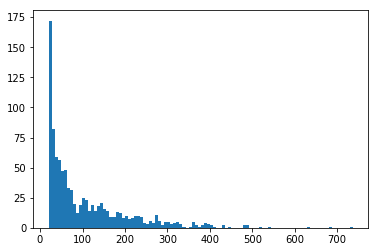

In [14]:
plt.hist(np.array(n_movie), bins = 100)
plt.show()

In [15]:
sort_movie_n = Counter(n_movie)
sort_movie_n

Counter({20: 32,
         21: 24,
         22: 23,
         23: 21,
         24: 21,
         25: 16,
         26: 19,
         27: 16,
         28: 15,
         29: 12,
         30: 14,
         31: 8,
         32: 9,
         33: 16,
         34: 8,
         35: 11,
         36: 8,
         37: 8,
         38: 9,
         39: 8,
         40: 7,
         41: 8,
         42: 8,
         43: 10,
         44: 8,
         45: 5,
         46: 7,
         47: 12,
         48: 6,
         49: 6,
         50: 5,
         51: 12,
         52: 3,
         53: 9,
         54: 6,
         55: 6,
         56: 6,
         57: 8,
         58: 10,
         59: 6,
         60: 3,
         61: 2,
         62: 7,
         63: 6,
         64: 7,
         65: 6,
         66: 6,
         67: 4,
         68: 5,
         69: 2,
         70: 3,
         71: 7,
         72: 2,
         73: 4,
         74: 4,
         75: 8,
         76: 4,
         77: 2,
         78: 1,
         79: 3,
         80: 4,
       

In [16]:
n_user = []
for i in range(1,1682):
    n_user += [len(user_movie.iloc[i,user_movie.loc[i].values>0])]

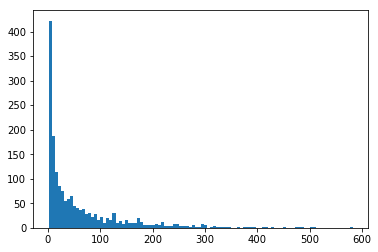

In [17]:
plt.hist(np.array(n_user), bins = 100)
plt.show()

In [18]:
sort_user_n = Counter(n_user)
sort_user_n

Counter({1: 140,
         2: 68,
         3: 60,
         4: 64,
         5: 51,
         6: 39,
         7: 44,
         8: 30,
         9: 33,
         10: 33,
         11: 20,
         12: 28,
         13: 25,
         14: 14,
         15: 22,
         16: 19,
         17: 10,
         18: 24,
         19: 18,
         20: 12,
         21: 14,
         22: 17,
         23: 12,
         24: 12,
         25: 14,
         26: 14,
         27: 17,
         28: 12,
         29: 9,
         30: 8,
         31: 15,
         32: 14,
         33: 7,
         34: 12,
         35: 7,
         36: 4,
         37: 8,
         38: 7,
         39: 16,
         40: 12,
         41: 11,
         42: 7,
         43: 12,
         44: 17,
         45: 10,
         46: 12,
         47: 7,
         48: 9,
         49: 8,
         50: 10,
         51: 4,
         52: 5,
         53: 8,
         54: 6,
         55: 4,
         56: 3,
         57: 9,
         58: 8,
         59: 10,
         60: 5,
        

### ユーザーの情報

In [19]:
f = open('../data/u.user')
user_info = f.read()
f.close()

In [20]:
split_user = user_info.split('\n')
users = []
for user in split_user:
    users += [user.split('|')] 

In [21]:
user_df = pd.DataFrame(users,columns=['user id','age','gender',
                                      'occupation','zip code'])
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 5 columns):
user id       944 non-null object
age           943 non-null object
gender        943 non-null object
occupation    943 non-null object
zip code      943 non-null object
dtypes: object(5)
memory usage: 37.0+ KB


In [22]:
user_df.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


#### occupationをone-hot表記化

In [23]:
occupation_one_hot = pd.get_dummies(user_df['occupation'])
user_df = pd.concat([user_df, occupation_one_hot], axis=1)
user_df.drop('occupation', axis=1, inplace=True)

In [24]:
user_df.head()

,user id,age,gender,zip code,administrator,artist,doctor,educator,engineer,entertainment,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
0,1,24,M,85711,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,53,F,94043,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,23,M,32067,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,24,M,43537,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,33,F,15213,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## test split

In [25]:
from scipy.sparse import lil_matrix
from scipy import sparse
from scipy import io
import pickle

In [26]:
title = np.array(title)
rating_df = pd.read_csv('../data/u.data', sep='\t',
                        names=['user id', 'item id',
                               'rating', 'timestamp'])
id_rating = [[] for i in range(943)]
for i in range(len(rating_df)):
    id_rating[rating_df['user id'][i]-1]\
    += [(rating_df['item id'][i], rating_df['rating'][i])]

In [27]:
# 各userのratingを一つずつtest用にする
id_test_rating = [[] for i in range(943)]
for i in range(len(id_rating)):
    random_index = np.random.randint(len(id_rating[i]))
    id_test_rating[i] = [id_rating[i][random_index]]
    del id_rating[i][random_index]
    
id_rating_np = np.zeros((len(id_rating), 1682))
for i in range(len(id_rating)):
    for j in range(len(id_rating[i])):
        id_rating_np[i-1][id_rating[i][j][0]-1] = id_rating[i][j][1]
# 各movie id が training に１つ以上入っていない場合エラーを出力
I = id_rating_np > 0
for i in range(len(I[0])):
    assert I[:,i].sum() >= 1, 'test_split error'
id_rating_lil = lil_matrix(id_rating_np)
movie_sum = np.sum(id_rating_np, axis=0)
del id_rating_np

In [28]:
rating_pair = {}
for i in range(len(id_rating)):
    for j in range(len(id_rating[i])):
        rating_pair[(i+1, id_rating[i][j][0])] =\
        id_rating[i][j][1]
title_test_pair = [{} for i in range(943)]
rating_test_pair = {}
for i in range(len(id_test_rating)):
    for j in range(len(id_test_rating[i])):
        rating_test_pair[(i+1, id_test_rating[i][j][0])] =\
        id_test_rating[i][j][1]
        title_test_pair[i][title[id_rating[i][j][0]-1]] =\
        id_rating[i][j][1]

### データ保存

In [29]:
import sys
sys.path.append("..")
import module as md

In [30]:
io.savemat("../data/id_rating_lil",{"mat":id_rating_lil})
md.save_model(title, '../data/title.pickle')
md.save_model(id_test_rating, '../data/id_test_rating.pickle')
md.save_model(id_rating, '../data/id_rating.pickle')
md.save_model(rating_test_pair, '../data/rating_test_pair.pickle')
md.save_model(movie_sum, '../data/movie_sum.pickle')